# 1. Librerias a utilizar

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
input_path = Path('/kaggle/input/tabular-playground-series-jan-2021/')

/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv


# 2. Estructura general: Dataset de entrenamiento / Dataset de testing

In [2]:
#Dataset con los datos de entrenamiento

train = pd.read_csv(input_path / 'train.csv', index_col='id')
train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [3]:
#Dataset con los datos de testing

test = pd.read_csv(input_path / 'test.csv', index_col='id')
train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cont1   300000 non-null  float64
 1   cont2   300000 non-null  float64
 2   cont3   300000 non-null  float64
 3   cont4   300000 non-null  float64
 4   cont5   300000 non-null  float64
 5   cont6   300000 non-null  float64
 6   cont7   300000 non-null  float64
 7   cont8   300000 non-null  float64
 8   cont9   300000 non-null  float64
 9   cont10  300000 non-null  float64
 10  cont11  300000 non-null  float64
 11  cont12  300000 non-null  float64
 12  cont13  300000 non-null  float64
 13  cont14  300000 non-null  float64
 14  target  300000 non-null  float64
dtypes: float64(15)
memory usage: 36.6 MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 499990
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cont1   200000 non-null  float64
 1   cont2   200000 non-null  float64
 2   cont3   200000 non-null  float64
 3   cont4   200000 non-null  float64
 4   cont5   200000 non-null  float64
 5   cont6   200000 non-null  float64
 6   cont7   200000 non-null  float64
 7   cont8   200000 non-null  float64
 8   cont9   200000 non-null  float64
 9   cont10  200000 non-null  float64
 10  cont11  200000 non-null  float64
 11  cont12  200000 non-null  float64
 12  cont13  200000 non-null  float64
 13  cont14  200000 non-null  float64
dtypes: float64(14)
memory usage: 22.9 MB


In [6]:
#Tamaño del dataset (cantidad de filas y columnas)

train.shape

(300000, 15)

In [7]:
test.shape

(200000, 14)

Segun se observa el dataset de entrenamiento tiene 300000 filas
A su vez esta compuesto por 15 columnas, 14 correspondientes a los features y una correspondiente al target

In [8]:
#Cantidad de datos del dataset

train.size

4500000

In [9]:
test.size

2800000

In [10]:
#Verfico la presencia de Nulos en los datos de cada columnas.
#Esto tambien se observo en train.info() / test.info()

train.isnull().sum()

cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
target    0
dtype: int64

In [11]:
test.isnull().sum()

cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
dtype: int64

In [12]:
#Verifico la existencia de filas duplicadas

train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

In [14]:
#Observo para cada columna la cantidad de datos unicos

train.nunique()

cont1     299865
cont2     299906
cont3     299745
cont4     299892
cont5     299730
cont6     299830
cont7     299876
cont8     299853
cont9     299651
cont10    299851
cont11    299887
cont12    299886
cont13    299728
cont14    299868
target    299811
dtype: int64

In [15]:
test.nunique()

cont1     199933
cont2     199957
cont3     199886
cont4     199957
cont5     199871
cont6     199936
cont7     199947
cont8     199935
cont9     199835
cont10    199939
cont11    199955
cont12    199952
cont13    199894
cont14    199928
dtype: int64

# 3. Distribucion de valores numericos en columnas

In [16]:
#Genero una variable con el nombre de las columnas

columnas_train = train.columns
columnas_test = test.columns

In [17]:
def grafico_distribucion(columna1,columna2):
    
    import random
    
    paleta = sns.color_palette()
    color = random.choice(paleta)

    fig, ax = plt.subplots(1,2,sharex=True, figsize=(10,5))
    sns.distplot(columna1.values, color=color,ax=ax[0])
    sns.distplot(columna2.values, color=color,ax=ax[1])
    
    fig.suptitle('Distribucion valores numericos columna: '+ i,fontsize=14)
    
    ax[0].set_title("Train", fontsize=12)
    ax[0].set_xlabel("Cantidad",fontsize=10)
    ax[0].set_ylabel("Valor",fontsize=10)
    
    ax[1].set_title("Test", fontsize=12)
    ax[1].set_xlabel("Cantidad",fontsize=10)
    ax[1].set_ylabel("Valor",fontsize=10) 
    
    plt.show()

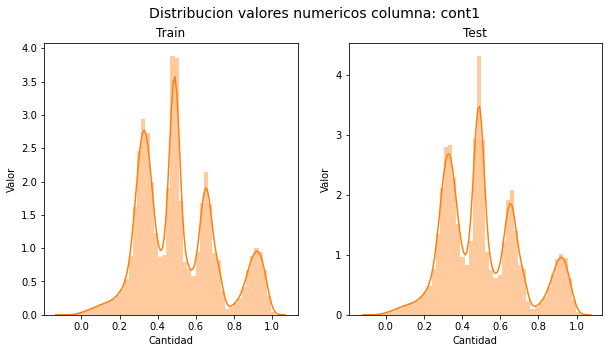

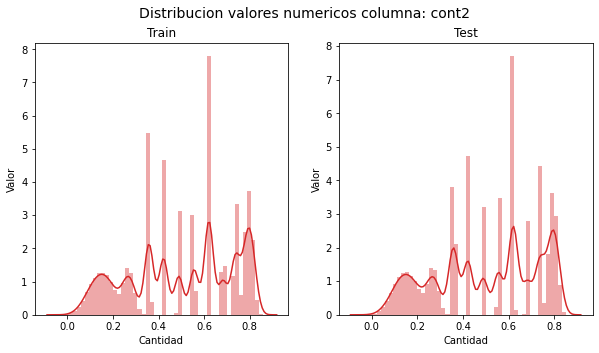

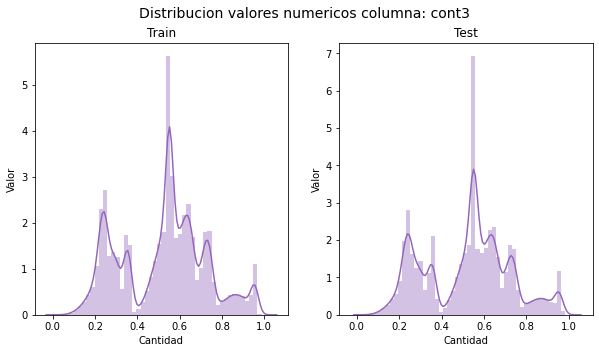

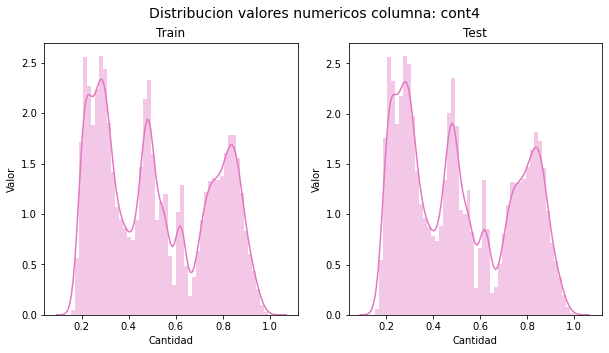

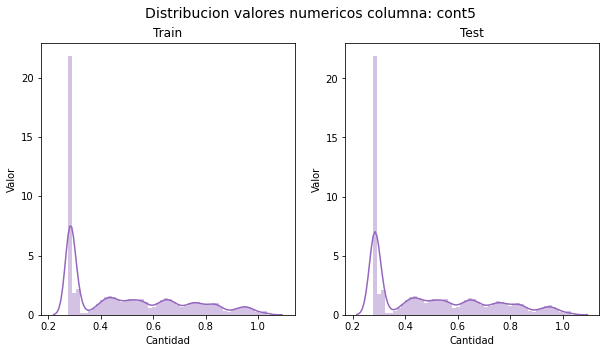

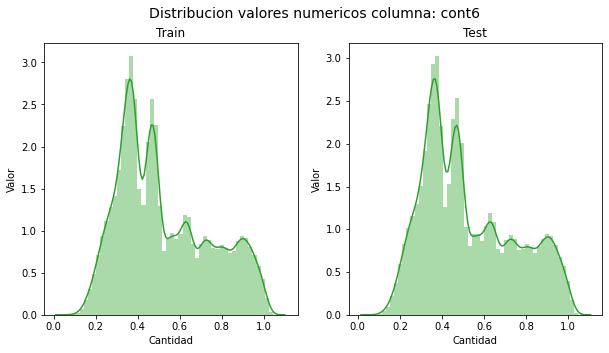

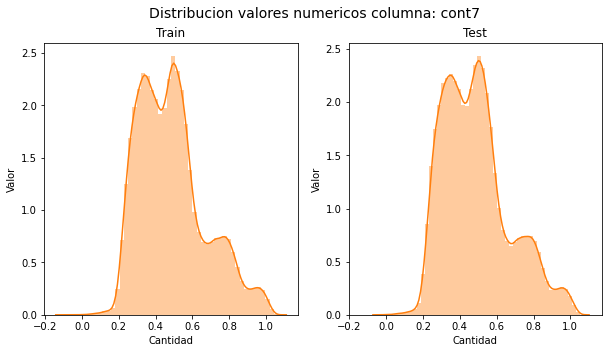

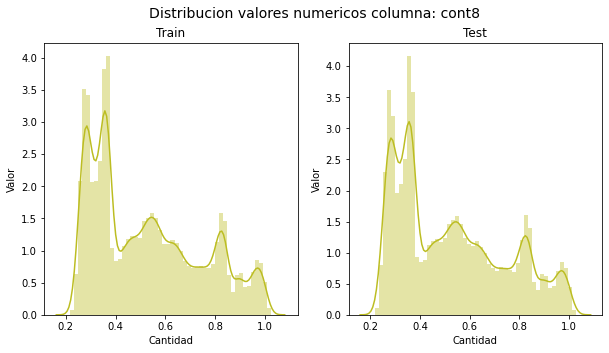

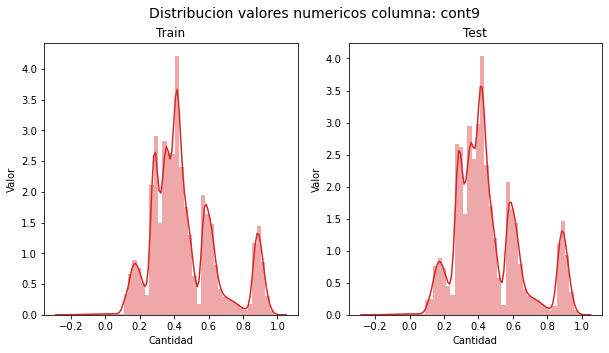

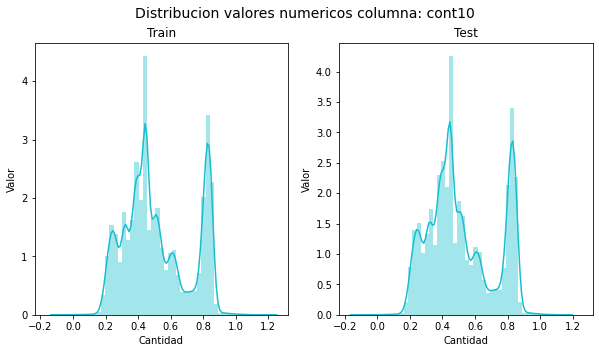

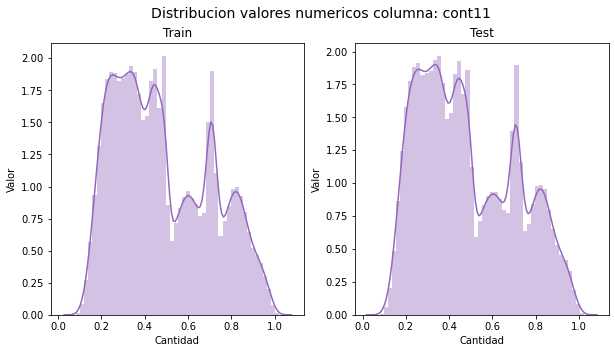

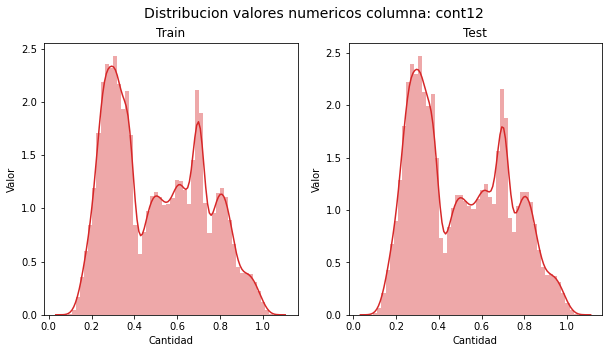

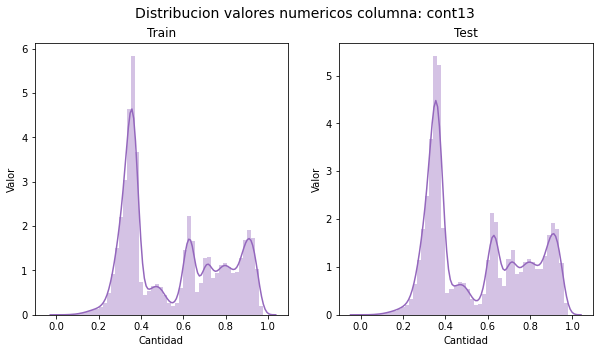

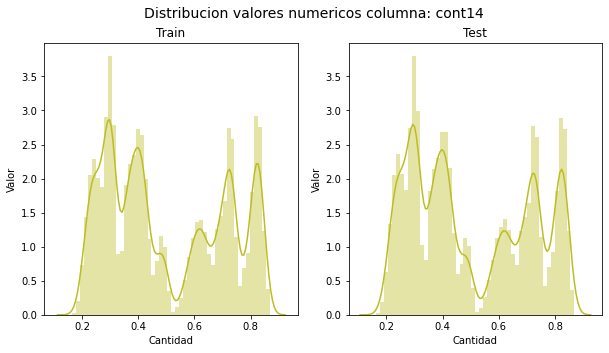

In [18]:
#Grafico las distribuciones para las columnas de test

for i in columnas_test:
    columna1 = train[i]
    columna2 = test[i]
    
    grafico_distribucion(columna1,columna2)

## 3.1 Correlacion

In [19]:
correlacion_train = train.corr()
correlacion_train

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
cont1,1.000000,-0.080170,-0.419712,0.273705,-0.059012,0.698556,0.341478,0.373340,0.794003,0.725040,0.565717,0.600041,0.570382,0.067294,-0.032994
cont2,-0.080170,1.000000,0.334487,-0.005533,0.150737,0.023692,0.116222,0.081049,-0.046769,0.035101,0.126024,0.092642,0.017383,0.023972,0.067102
cont3,-0.419712,0.334487,1.000000,-0.329131,0.060931,-0.300509,0.106904,-0.309783,-0.406743,-0.289756,-0.075415,-0.103735,-0.386521,-0.065457,0.058936
cont4,0.273705,-0.005533,-0.329131,1.000000,0.123526,0.152752,-0.077045,0.324784,0.261927,0.204139,0.063961,0.073291,0.155226,0.054703,0.005522
cont5,-0.059012,0.150737,0.060931,0.123526,1.000000,-0.179084,-0.241272,0.010438,-0.071764,-0.102531,-0.222244,-0.192571,-0.140272,0.040552,-0.005358
cont6,0.698556,0.023692,-0.300509,0.152752,-0.179084,1.000000,0.541975,0.415008,0.716613,0.770628,0.737495,0.757105,0.783604,0.067007,0.027955
cont7,0.341478,0.116222,0.106904,-0.077045,-0.241272,0.541975,1.000000,0.150403,0.341759,0.465418,0.672188,0.657310,0.322415,-0.037135,0.067234
cont8,0.373340,0.081049,-0.309783,0.324784,0.010438,0.415008,0.150403,1.000000,0.429986,0.362336,0.296598,0.323042,0.475072,0.100645,0.014698
cont9,0.794003,-0.046769,-0.406743,0.261927,-0.071764,0.716613,0.341759,0.429986,1.000000,0.725053,0.575095,0.605091,0.628391,0.081992,-0.013029
cont10,0.725040,0.035101,-0.289756,0.204139,-0.102531,0.770628,0.465418,0.362336,0.725053,1.000000,0.677570,0.701872,0.650809,0.047727,-0.021143


In [20]:
correlacion_test = test.corr()
correlacion_test

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cont1,1.000000,-0.082585,-0.417495,0.275307,-0.056399,0.698535,0.341539,0.370877,0.793909,0.724957,0.566559,0.599909,0.569962,0.068938
cont2,-0.082585,1.000000,0.337509,-0.003650,0.147901,0.024034,0.118991,0.077611,-0.051245,0.032237,0.125221,0.088824,0.012948,0.020571
cont3,-0.417495,0.337509,1.000000,-0.328906,0.061926,-0.301686,0.108083,-0.312742,-0.406330,-0.289800,-0.076862,-0.101536,-0.387538,-0.071835
cont4,0.275307,-0.003650,-0.328906,1.000000,0.123700,0.158096,-0.072328,0.328802,0.263973,0.210388,0.070052,0.076264,0.158964,0.064129
cont5,-0.056399,0.147901,0.061926,0.123700,1.000000,-0.175872,-0.239742,0.009990,-0.069171,-0.099167,-0.219625,-0.189577,-0.140487,0.039636
cont6,0.698535,0.024034,-0.301686,0.158096,-0.175872,1.000000,0.540750,0.417206,0.716890,0.772616,0.737613,0.756266,0.785525,0.066742
cont7,0.341539,0.118991,0.108083,-0.072328,-0.239742,0.540750,1.000000,0.150361,0.339620,0.466699,0.670411,0.657032,0.323273,-0.041715
cont8,0.370877,0.077611,-0.312742,0.328802,0.009990,0.417206,0.150361,1.000000,0.429640,0.362047,0.298477,0.321714,0.474232,0.101910
cont9,0.793909,-0.051245,-0.406330,0.263973,-0.069171,0.716890,0.339620,0.429640,1.000000,0.726754,0.575068,0.604410,0.628871,0.084988
cont10,0.724957,0.032237,-0.289800,0.210388,-0.099167,0.772616,0.466699,0.362047,0.726754,1.000000,0.680525,0.702187,0.651329,0.050910


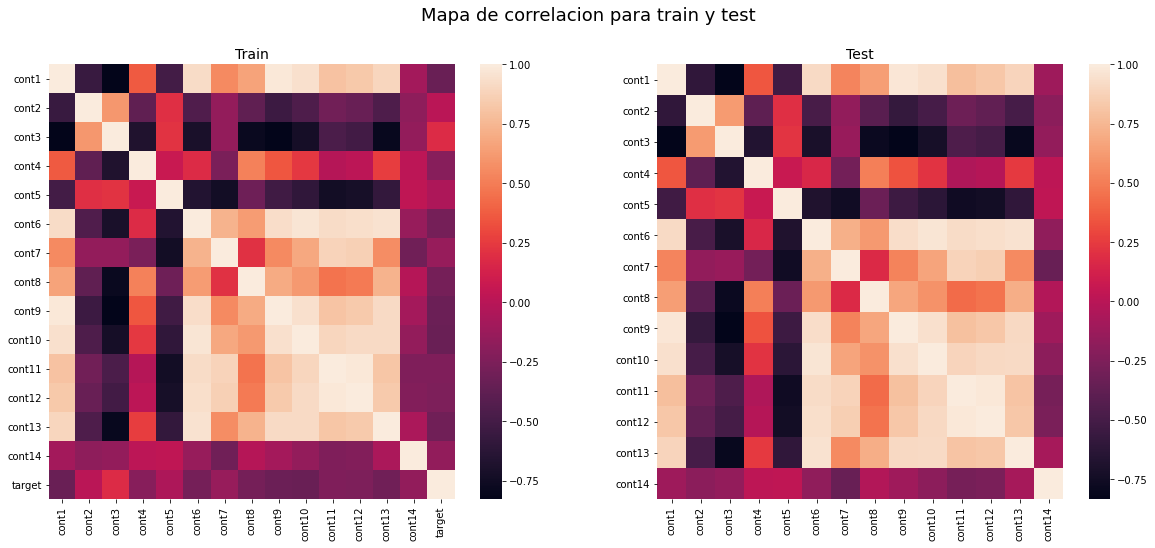

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.heatmap(correlacion_train.corr(),ax=ax[0])
sns.heatmap(correlacion_test.corr(),ax=ax[1])
    
fig.suptitle('Mapa de correlacion para train y test',fontsize=18)
    
ax[0].set_title("Train", fontsize=14)
    
ax[1].set_title("Test", fontsize=14)

    
plt.show()